In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1. Data cleaning

In [4]:
df.shape

(891, 12)

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(columns=["PassengerId","Name","Ticket","Cabin"],inplace=True)

In [8]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# 2. EDA

In [9]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
np.round(pd.crosstab(df['Survived'],df["Sex"],normalize='columns')*100,2)

Sex,female,male
Survived,,
0,25.8,81.11
1,74.2,18.89


In [11]:
pd.crosstab(df['Survived'],df['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [12]:
pd.crosstab(index=[df['Pclass'],df['Survived']],columns=df['Sex'],margins=True)

Sex              female  male  All
Pclass Survived                   
1      0              3    77   80
       1             91    45  136
2      0              6    91   97
       1             70    17   87
3      0             72   300  372
       1             72    47  119
All                 314   577  891

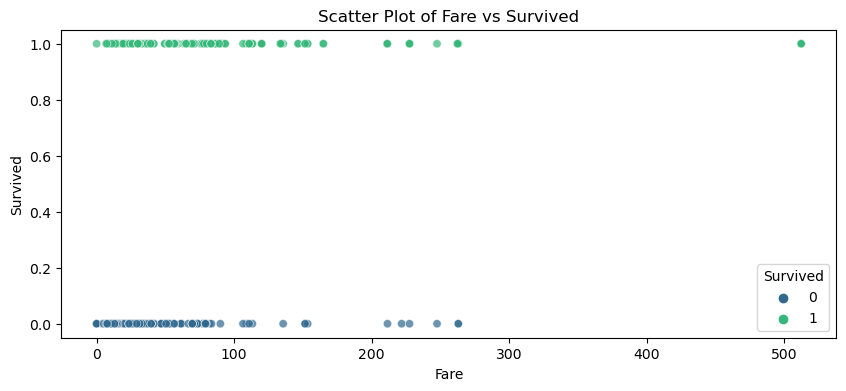

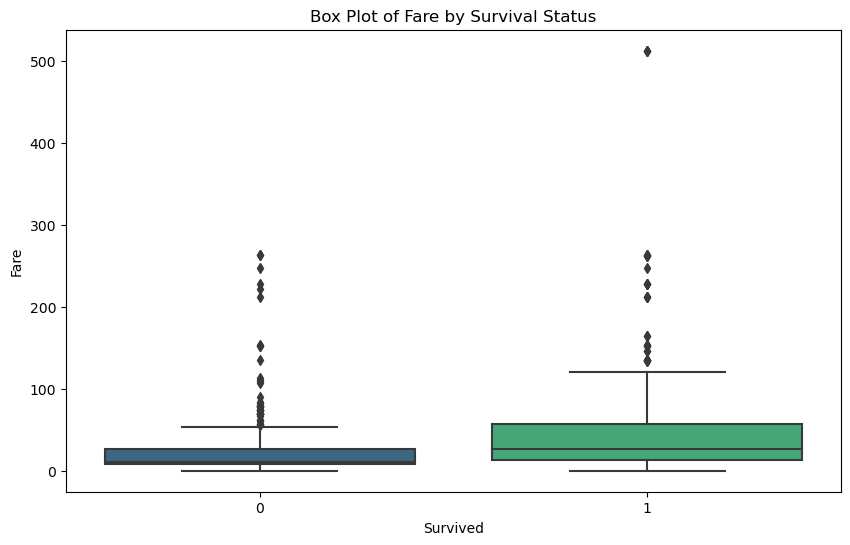

In [13]:
plt.figure(figsize=(10, 4))
sns.scatterplot(data=df, x='Fare', y='Survived', hue='Survived', palette='viridis', alpha=0.7)
plt.title('Scatter Plot of Fare vs Survived')
plt.xlabel('Fare')
plt.ylabel('Survived')
plt.show()

# Creating a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Survived', y='Fare', palette='viridis')
plt.title('Box Plot of Fare by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

# 3. Pre processing

In [14]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier

In [16]:
x=df.drop("Survived",axis='columns')
y=df['Survived']

In [17]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5000,S
733,2,male,23.0,0,0,13.0000,S
382,3,male,32.0,0,0,7.9250,S
704,3,male,26.0,1,0,7.8542,S
813,3,female,6.0,4,2,31.2750,S


In [20]:
# imputation transformer
trf1 = ColumnTransformer([
    ('impute_age',SimpleImputer(),[2]),
    ('impute_embarked',SimpleImputer(strategy='most_frequent'),[6])
],remainder='passthrough')

In [21]:
trf2 = ColumnTransformer([
    ('ohe_sex_embarked',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,6])
],remainder='passthrough')

In [26]:
# Scaling
trf3 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,10))
])


In [28]:
# train the model
trf4 = DecisionTreeClassifier()

In [29]:
pipe=Pipeline([
    ("trf1",trf1),
    ("trf2",trf2),
    ("trf3",trf3),
    ("trf4",trf4)
])

In [30]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),


In [35]:
y_pred=pipe.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6256983240223464

In [37]:
import pickle
pickle.dump(pipe,open("pipe.pkl","wb"))